# Discrete Probability Distributions

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

 Common discrete random variables:

*    Binary Random Variable: x in {0, 1}
*    Categorical Random Variable: x in {1, 2, …, K}.

## Binomial Distribution

example of simulating a binomial process and counting success

In [29]:
p = 0.3 # define the parameters of the distribution
n = 100 # n trials and p probability of succes

success = stats.binom(n,p) # run a single simulation
print('Total Success: %d' % success.rvs())

Total Success: 32


* we can calculate the expected value or mean and the variance

In [38]:
p = 0.3 # define the parameters of the distribution
n = 100
# calculate moments
#mean, var, skew, kurt = norm.stats(moments='mvsk')
mean, var, _, _= binom.stats(n, p, moments='mvsk')
print('Mean=%.3f, Variance=%.3f' % (mean, var))

Mean=30.000, Variance=21.000


Use probability mass function to calculate the likelihood of different numbers of successful outcomes for a sequence of trials, such as:

In [55]:
p = 0.3
k = 100

dist = stats.binom(k, p) # creates an object

for n in range(10, 110, 10): # # calculate the probability of n successes
	print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))

P of 10 success: 0.000%
P of 20 success: 0.758%
P of 30 success: 8.678%
P of 40 success: 0.849%
P of 50 success: 0.001%
P of 60 success: 0.000%
P of 70 success: 0.000%
P of 80 success: 0.000%
P of 90 success: 0.000%
P of 100 success: 0.000%


 * cumulative distribution function

In [56]:
p = 0.3
k = 100

dist = stats.binom(k, p)

for n in range(10, 110, 10):
	print('P of %d success: %.3f%%' % (n, dist.cdf(n)*100))

P of 10 success: 0.000%
P of 20 success: 1.646%
P of 30 success: 54.912%
P of 40 success: 98.750%
P of 50 success: 99.999%
P of 60 success: 100.000%
P of 70 success: 100.000%
P of 80 success: 100.000%
P of 90 success: 100.000%
P of 100 success: 100.000%


## Bernoulli Distribution

* the basis of the binomial distribution, is the Bernoulli distribution which has only two states

In [14]:
import seaborn as sb

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernouli')]

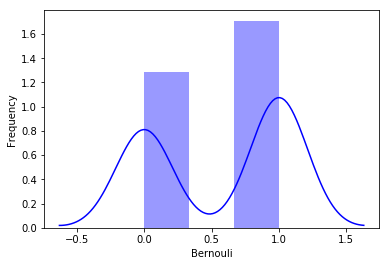

In [80]:
data_bern = stats.bernoulli(0.6)
#data_bern.rvs(1000)
ax = sb.distplot(data_bern.rvs(100),  # Flexibly plot a univariate distribution of observations
                 kde=True, # this function combines the matplotlib hist function with the seaborn kdeplot() 
                 color='blue') # hist_kws={"linewidth": 25,'alpha':1}
ax.set(xlabel='Bernouli', ylabel='Frequency')

## Poisson Distribution

* The Poisson distribution is originated from binomial distribution, which express probabilities of events counting over a certain period of time.
* the difference is subtle: 
 - whereas the binomial distribution looks at how many times we register a success over a fixed total number of trials,the Poisson distribution measures how many times a discrete event occurs, over a period of continuous space or time.

$$P[X=k]=\frac{e^{-\lambda}\lambda^k}{k!} $$

* The positive real number λ is equal to the expected value of X and also to its variance

$$ \lambda=E(x) $$

Poisson process on a disk

(-1.0936769145044498,
 1.0958178375130612,
 -1.0793838866305685,
 1.0547506733887366)

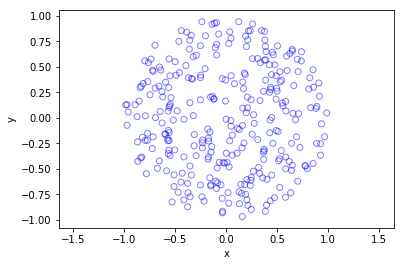

In [18]:
r=1  #radius of disk
xx0=0 
yy0=0 #centre of disk
areaTotal=np.pi*r**2 #area of disk
 
lambda0=100 #intensity (ie mean density) of the Poisson process
 
numbPoints = np.random.poisson(lambda0*areaTotal) #Poisson number of points (samples)
theta=2*np.pi*np.random.uniform(0,1,numbPoints) #angular coordinates 
rho=r*np.sqrt(np.random.uniform(0,1,numbPoints)) #radial coordinates 
 
#Convert from polar to Cartesian coordinates
xx = rho * np.cos(theta)
yy = rho * np.sin(theta)
#Shift centre of disk to (xx0,yy0) 
xx=xx+xx0
yy=yy+yy0
#Plotting
plt.scatter(xx,yy, edgecolor='b', facecolor='none', alpha=0.5 )
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

* examples of poisson distributions

Text(0, 0.5, 'P(X)')

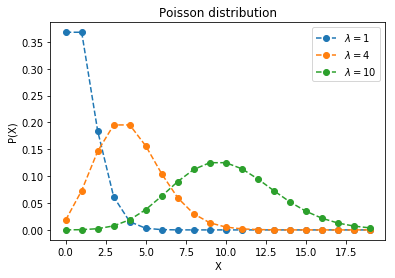

In [5]:
lambdas = [1,4,10]    
k = np.arange(20)       # generate x-values
#markersize = 8
for par in lambdas:
    plt.plot(k, stats.poisson.pmf(k, par), 'o--', label='$\lambda={0}$'.format(par))
        
plt.legend() # Format the plot
plt.title('Poisson distribution')
plt.xlabel('X')
plt.ylabel('P(X)')

* example, If the average number of cars that cross a particular street in a day is 25, then you can find the probability of 28 cars passing the street

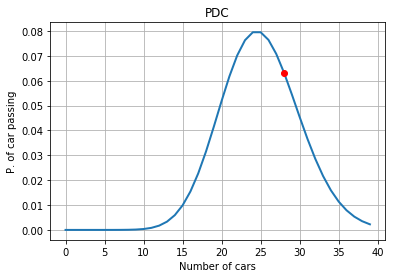

In [8]:
arr = []
rv = stats.poisson(25)
for num in range(0,40):
    arr.append(rv.pmf(num))
 
prob = rv.pmf(28)
plt.grid(True)
plt.plot(arr, linewidth=2.0)
plt.plot([28], [prob], marker='o', markersize=6, color="red")
plt.ylabel('P. of car passing')
plt.xlabel('Number of cars')
plt.title('PDC')
plt.show()

another example